# Classification trees
This lab is a level up from previous sessions ! There is no code snippet for demonstration, as you should now be able to answer the different questions by reading the documentation.

## Classification trees

### Building a tree

**Questions**:
1. Build a decision tree on your previously processed dataset, using `DecisionTreeClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
2. What are the different available hyperparameters in sklearn for decision trees ?
3. Select optimum hyperparameters using a cross validation setting.
4. Return optimum parameters combination using cross validation and final accuracy (or recall or precision depending on your wanted target)
5. Explain how the attribute `feature_importances_` is computed.
6. Plot an elbow plot the most important features in your dataset and select the subset of most important features.
7. Run classification experiment and see if results are impacted.
8. **Bonus**: Use the features selected by the trees and test the two other classification method we tested: KNN and Naive Bayes.

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../titanic.csv").fillna(method="backfill")

In [68]:
# My target is survived 
y = df.Survived.values

# For demonstration, I'm taking only 4 columns
categorical_variables = ["Sex", "Embarked"]
quantitative_variables = ["Age", "Fare"]
X = df[categorical_variables + quantitative_variables].values

X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

# I need to one hot encode my categorical variables
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
X_cat_hot = onehot_encoder.fit_transform(X_categorical)
X_preprocess = np.concatenate([X_quantitative, X_cat_hot.toarray()], axis=1)

feature_names = quantitative_variables +  onehot_encoder.get_feature_names_out().tolist()

**1.**

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_preprocess, y)

DecisionTreeClassifier()

**2**.
The possible hyperparameters are:
- The split criterion
- The stop criteria (max_features and max_depth)

**3 and 4**.

In [89]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [162]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(estimator=decision_tree_classifier,
                              param_grid={"criterion": ["gini", "entropy"],
                                         "max_features": [1, 2, 3],
                                         "max_depth": range(1, 10, 1)})
grid_search_cv.fit(X_preprocess, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10), 'max_features': [1, 2, 3]})

In [163]:
print(f"Best score: {grid_search_cv.best_score_}")
print(f"For parameters: {grid_search_cv.best_params_}")
best_params = grid_search_cv.best_params_

# Fit tree using best params
decision_tree = DecisionTreeClassifier(**best_params)
decision_tree.fit(X_preprocess, y)

Best score: 0.7912685958194714
For parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 1}


DecisionTreeClassifier(max_depth=9, max_features=1)

**5**. The feature importance is "The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature". 

**6**.

[Text(0, 0, 'Age'),
 Text(1, 0, 'Fare'),
 Text(2, 0, 'x0_female'),
 Text(3, 0, 'x0_male'),
 Text(4, 0, 'x1_C'),
 Text(5, 0, 'x1_Q'),
 Text(6, 0, 'x1_S')]

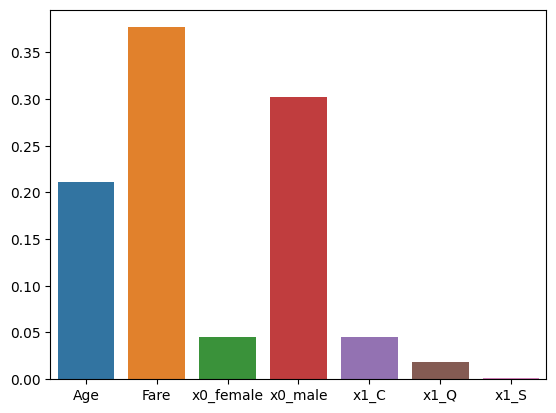

In [164]:
g = sns.barplot(x=list(range(len(decision_tree.feature_importances_))),
            y=decision_tree.feature_importances_)
g.set_xticklabels(feature_names)

**7**: most important features using elbow analysis : Age, Fare and Female.

In [165]:
sub_X_preprocess = X_preprocess[:,:5]

In [166]:
decision_tree_classifier = DecisionTreeClassifier()

grid_search_cv = GridSearchCV(estimator=decision_tree_classifier,
                              param_grid={"criterion": ["gini", "entropy"],
                                         "max_features": [1, 2, 3]})
grid_search_cv.fit(sub_X_preprocess, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3]})

In [167]:
print(f"Best score: {grid_search_cv.best_score_}")

Best score: 0.7576172242797062


### Representation

Trees can be represented using the `tree.plot_tree` function.

**Questions**:
1. Plot the previous tree.
2. Explain every single information provided by the tree.

In [168]:
from sklearn.tree import plot_tree

In [185]:
feature_names

['Age', 'Fare', 'x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S']

[Text(0.5, 0.8333333333333334, 'x[4] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'x[3] <= 0.5\ngini = 0.451\nsamples = 722\nvalue = [474, 248]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.42\nsamples = 240\nvalue = [72, 168]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.277\nsamples = 482\nvalue = [402, 80]'),
 Text(0.75, 0.5, 'x[1] <= 15.148\ngini = 0.494\nsamples = 169\nvalue = [75, 94]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.419\nsamples = 57\nvalue = [40, 17]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.43\nsamples = 112\nvalue = [35, 77]')]

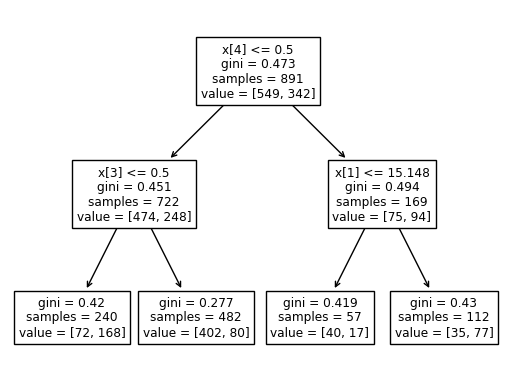

In [179]:
# Create classifier with the best found hyperparameters
best_params["max_depth"] = 2
decision_tree = DecisionTreeClassifier(**best_params)
decision_tree.fit(X_preprocess, y)
plot_tree(decision_tree)

In [177]:
best_params

{'criterion': 'gini', 'max_depth': 9, 'max_features': 1}

## Random forests
One of the major drawbacks of decision trees is their tendency to severely overfit on the data given as input. To improve this behavior, multiples trees are often built on randomly drawn subset of individuals and their contribution to the classification voted.

**Questions**:
1. Build a random forest using the class`RandomForestClassifier` https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.
2. Identify the hyperparameters and select the optimum combination using cross validation.
3. Train the random forest on the whole dataset and return the final score.
4. **Bonus**: compare the resilience to over fitting of trees and random forests by performing the following experiments: split the dataset into train and test, compare the results of the trees on train and test with the results of the random forest on the same dataset.

**1 and 2**. 

In [190]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

grid_search_cv = GridSearchCV(estimator=random_forest,
                              param_grid={"criterion": ["gini", "entropy"],
                                         "n_estimators": range(1, 10, 5)})
grid_search_cv.fit(X_preprocess, y)

print(f"Best score: {grid_search_cv.best_score_}")
print(f"For parameters: {grid_search_cv.best_params_}")
best_params = grid_search_cv.best_params_

Best score: 0.7822484464252087
For parameters: {'criterion': 'gini', 'n_estimators': 6}


**3**. Final score

In [191]:
best_params

{'criterion': 'gini', 'n_estimators': 6}

In [192]:
random_forest = RandomForestClassifier(**best_params)

random_forest.fit(X_preprocess, y)

print(f"Final score: {random_forest.score(X_preprocess, y)}")

Final score: 0.9483726150392817
